In [1]:
from completeRun import featureClf,cv_feature
from preamble import *
from copy import copy
from LocalDatasets import saveDict,readDict,ScoresFromPredictions,read_features,readDict, read_duration,checkForExist
from Noise2 import features
import seaborn as sns
from copy import copy
plt.rcParams['savefig.dpi'] = 200
Cat = [3,20, 21, 26, 333, 334, 335,40668, 4135, 4534, 469, 46, 50]
amountList = [0.25,0.5,0.75,1]
NonCat = [1038,1043,1046,1049,1050,1063,1067,1068,1176,11,12,1459,1462,1464,1466,1467,1468,1475,1476,1478,1479,1485,1487]
second = [1489, 1491, 1492, 1493, 1494, 1497, 14, 1501, 1504, 1510, 1515, 1570, 16, 18, 22, 28, 300, 30, 32, 36, 375, 37, 39,40499,40509,40, 4134, 41, 44, 4538, 458, 53, 54]
for i in second:
    NonCat.append(i)
          
cv = 10
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB','GradientBoost']


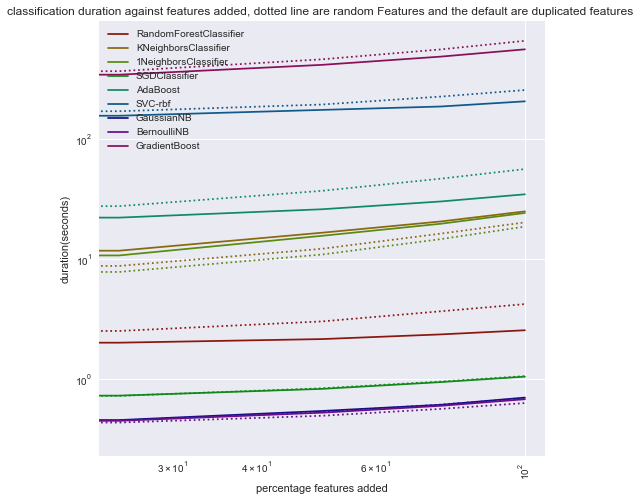

In [36]:
didList = Cat
for i in NonCat:
    didList.append(i)
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
dur1 = []
dur2 = []
dur3 = []
typ = 0

amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

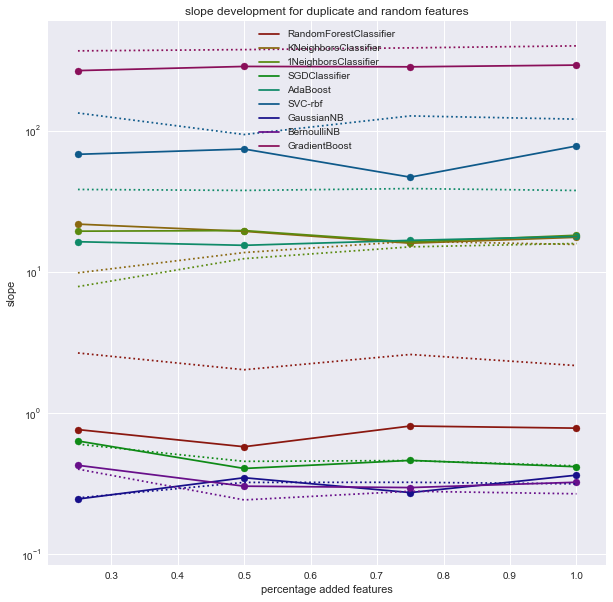

In [37]:
slopeDup = []
slopeRand = []
amountList2 = []
for i in amountList:
    amountList2.append(i/100)
for i,item in enumerate(dur2):
    slopeDup.append([])
    slopeRand.append([])
    for j,itemz in enumerate(item):
        if j == 0:
            count = 0
        else:
            slopeDup[i].append((dur2[i][j]-dur2[i][j-1])/(amountList2[j]-amountList2[j-1]))
            slopeRand[i].append((dur3[i][j]-dur3[i][j-1])/(amountList2[j]-amountList2[j-1]))

fig, ax = plt.subplots()
cl = sns.hls_palette(len(slopeDup), l=.3, s=.8)
for i,x in enumerate(slopeDup):
    ax.plot(amountList2[1:],slopeDup[i],label = clfNames[i],color= cl[i])
    ax.scatter(amountList2[1:],slopeDup[i],color= cl[i])
    ax.plot(amountList2[1:],slopeRand[i],ls = ':',color= cl[i])
plt.xlabel('percentage added features')
plt.ylabel('slope')
plt.title('slope development for duplicate(straight lines) and random features(dotte lines)')
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_yscale("log", nonposy='clip')
plt.legend()
plt.show()

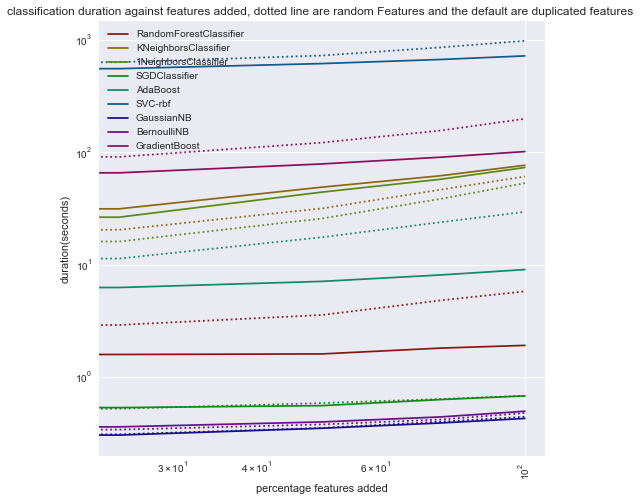

In [7]:
didList = Cat
# for i in NonCat:
#     didList.append(i)
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
dur1 = []
dur2 = []
dur3 = []
typ = 0

amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

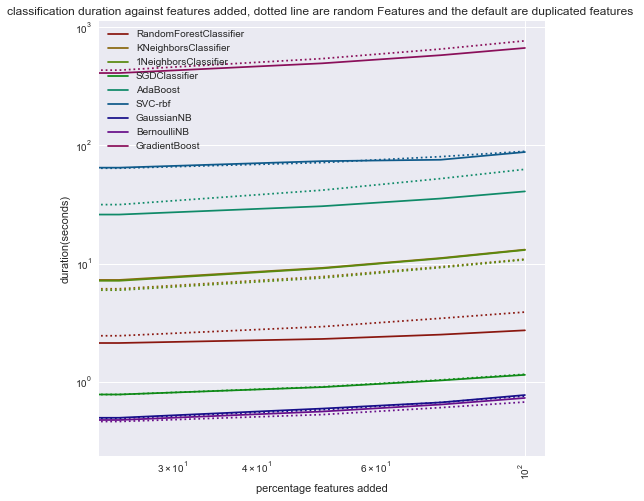

In [9]:
didList = []#Cat
for i in NonCat:
    didList.append(i)
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
dur1 = []
dur2 = []
dur3 = []
typ = 0

amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

### analysis categorical and numerical classification prediction duration
On this logscale most classifier do not have a significant change in duration. 
In particular RandomForestClassifier seems nearly unaffacted by the feature addition. This can be explained by no increase in n_neighbors and so the algorithm making the same size tree only with more features to check.
The KneighborsClassifier also show little difference between a single neighbor and the default setting of 5 neighbors with categorical datasets. The difference is a bit more noticable with the categorical datasets
The lines are also a bit more steeper with the categorical datasets.
The steepest curve seems to be from the KNeighborsClassifier which has a steep increase with the 25% added features and then afterwards increases steadily.
When you compare the results of duplicate with random features, most classifiers have increase durations, however KNeighborsClassifer has a lower duration increase. This can be explained by only three categorical categories for added features. The original features have more categories which can explain more computation. 
For the randomForestClassifier there is a large increase in duration this can be explained by the variance or noise depending on how you see it. The features have no inherent predicting capabilities so finding them can be the luck of the draw. This means that the RandomForestClassifier is trying to find something that is no there. 


For KNeighborsClassifier this comment:
 'if user attempts to classify a point that was zero distance from one or more training points, those training points are weighted as 1.0 and the other points as 0.0'. This results in duplicate features taking more time than random features as these points are classified faster as having weight 1.0. In the random case no features should have zero distance and so a different calculation is triggered.

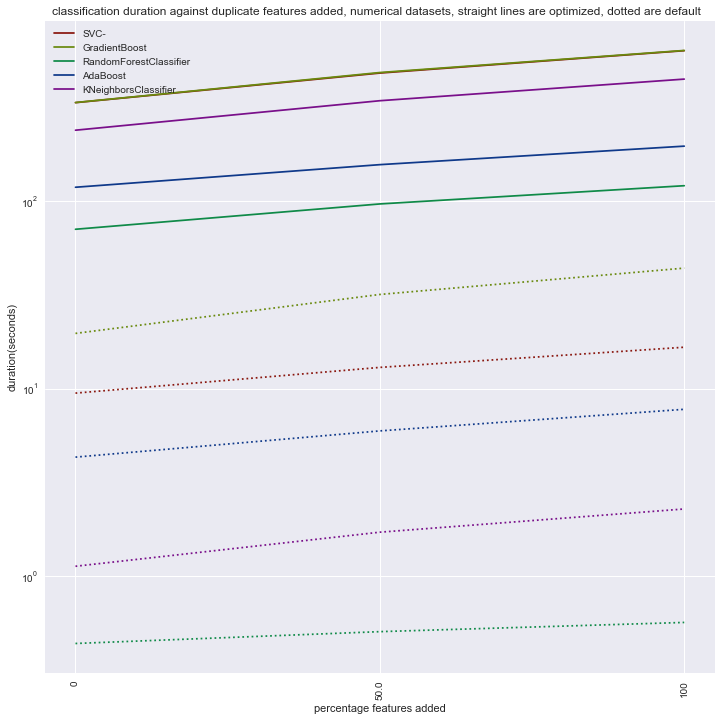

In [31]:
#print duration increase
didList = [11,
 1038,
 1043,
 1049,
 1050,
 37,
 1063,
 39,
 40,
 41,
 1067,
 1068,
 40496,
 53,
 54,
 1464,
 1467,
 40509,
 458,
 1510,
 1515]
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
clfNames = ['SVC-','GradientBoost','RandomForestClassifier', 'AdaBoost','KNeighborsClassifier']
func = 'cvScoreFeatures5'
func2 = 'cvOptScoreFeatures5'
dur1 = []
dur2 = []
dur3 = []
typ = 0
fig, ax = plt.subplots()
amountList = [0.5,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if clfName == 'SVC-':
                clfName = 'SVC-rbf'
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)                
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            if clfName == 'SVC-rbf':
                clfName = 'SVC-'
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],ls = ':' )
    _= ax.plot(x_axis,dur3[i], color = cl[i],label = clfNames[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against duplicate features added, numerical datasets, straight lines are optimized, dotted are default  ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(12)
fig.set_figwidth(12)
ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

### analysis duration increase
Gradient and SVC are overlapping as having nearly the same duration when optimizing. 

Most notable is the exponential increase of KNeighborsClassifier compared to the others as it overtakes AdaBoost in time and is nearing the time of GradientBoost and SVC. This increase can be explained as the optimizer increasing n_neighbors or the distance calculation mechanic.

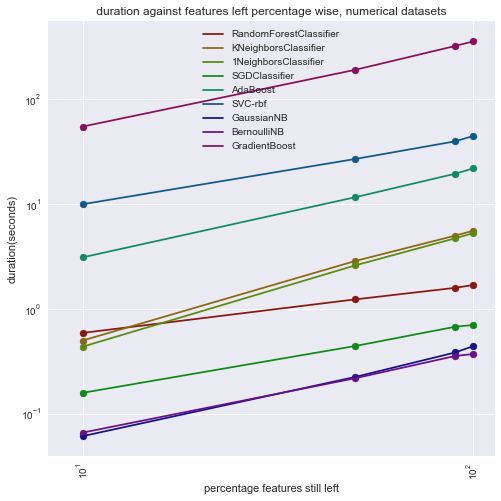

In [36]:
listDone = []
for did in NonCat:
    if readDict(did)['NumberOfFeatures'] > 30 and readDict(did)['NumberOfInstances'] < 100000:
        listDone.append(did)
func = 'removedFeatures'
didList = listDone
dur1 = []
dur2 = []
typ = 0

amountList = [0.1,0.5,0.9] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
    dur2[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
fig, ax = plt.subplots()
cl = sns.hls_palette(len(dur2), l=.3, s=.8)
amountList = [1,0.9,0.5,0.1]
for i,x in enumerate(amountList):
    amountList[i] = x*100
x_axis = amountList
for i in range(0,len(dur2)):
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    ax.scatter(x_axis,dur2[i], color = cl[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' duration against features left percentage wise, numerical datasets ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage features still left')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

#### duration 
Duration is calculated as classification and prediction time combined.
### Analysis duration features removed
For all classifiers a clear increase can be seen, but remarkable is the only slight increase for RandomForestClassifier as opposed to KNeighborsClassifier. This can be the influx of the features has a great effect on the prediction for KNeighborsClassifer as it has to make greater calculations 

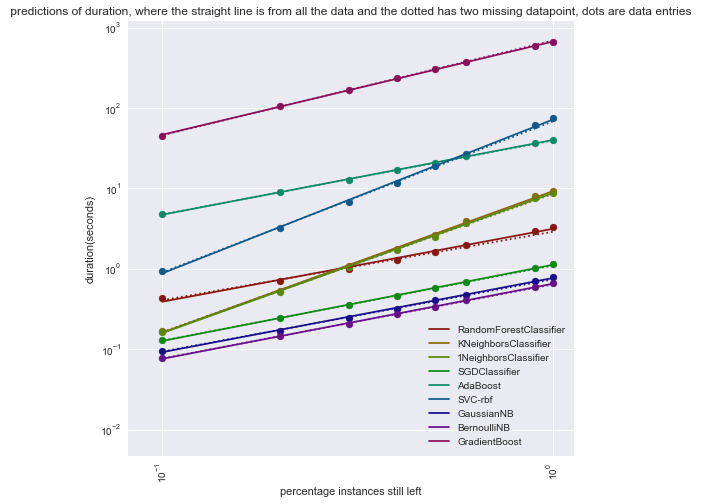

In [37]:
path = 'D:\\DropboxFolder\\Dropbox\\afstudeer\\results\\scalability\\1NeighborsClassifier'
path = 'D:\\Dropbox\\Dropbox\\afstudeer\\results\\scalability\\1NeighborsClassifier'
listExtra = []
for did in didList:
    path = 'D:\\Dropbox\\Dropbox\\afstudeer\\results\\scalability\\1NeighborsClassifier\\' + str(did)    
    for (dirpath, dirnames, filenames) in os.walk(path):
        for dirname in dirnames:
            if dirname == '0.8':
                listExtra.append(did)

didList = listExtra
func = 'scalability'
# didList = listDone
dur1 = []
dur2 = []
typ = 0
amountList = [0.0,0.1,0.4,0.5,0.6,0.7,0.8,0.9] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
    dur2[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,did,amount)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,amount)[typ]/len(didList)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,amount)[typ+1]/len(didList)
predisComplete = []
# amountList = [1,0.9,0.5,0.1]
amountList = [1-i for i in amountList]
x_axis = amountList
for i,clfName in enumerate(clfNames):
    predisComplete.append(np.polyfit(np.log(x_axis),np.log(dur1[i]),1))
predisIncomplete = []
for i,clfName in enumerate(clfNames):
    predisIncomplete.append(np.polyfit(np.log(x_axis[2:]),np.log(dur1[i][2:]),1))
dur7 = []
for i,fit in enumerate(predisComplete):
    dur7.append([])
    for k,value in enumerate(x_axis):
        dur7[i].append(np.exp(fit[0]*np.log(value) + fit[1]))
dur8 = []
for i,fit in enumerate(predisIncomplete):
    dur8.append([])
    for k,value in enumerate(x_axis):
        dur8[i].append(np.exp(fit[0]*np.log(value) + fit[1]))
cl = sns.hls_palette(len(dur1), l=.3, s=.8)
fig, ax = plt.subplots()
for i in range(0,len(dur1)):
    _= ax.plot(x_axis,dur7[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur8[i], color = cl[i],ls = ':' )
    _= ax.scatter(x_axis,dur1[i], color = cl[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' predictions of duration, where the straight line is from all the data and the dotted has two missing datapoint, dots are data entries ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage instances still left')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

In [75]:
from sklearn.kernel_ridge import KernelRidge
listik = [953,
6,
60,
46,
4538,
4534,
44,
4135,
4134,
40706,
40702,
40697,
40696,
40695,
40687,
40680,
40677,
40670,
40668,
40664,
40656,
40655,
40654,
40653,
40652,
40651,
40650,
40649,
40648,
40647,
40646,
40645,
1022,
1036,
1038,
1043,
1049,
1050,
1067,
1068,
1120,
1176,
12,
1461,
1466,
1468,
1475,
1476]


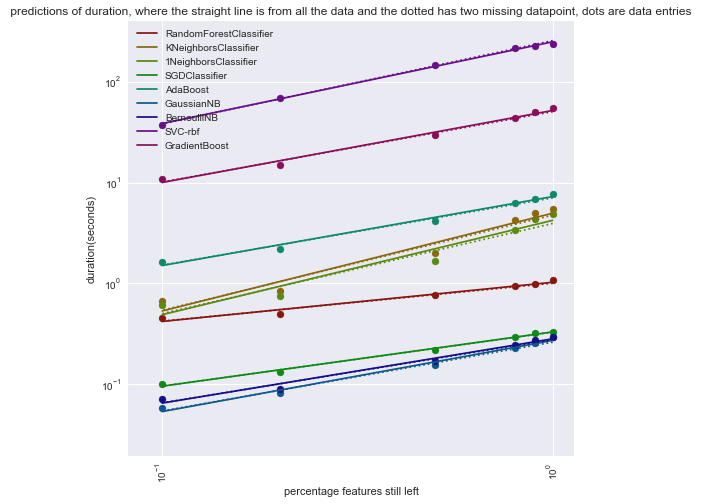

In [76]:
path = 'D:\\DropboxFolder\\Dropbox\\afstudeer\\results\\removedFeatures\\1NeighborsClassifier'
path = 'D:\\Dropbox\\Dropbox\\afstudeer\\results\\removedFeatures\\1NeighborsClassifier'
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'GaussianNB', 'BernoulliNB']
clfNames.append('SVC-rbf')
clfNames.append('GradientBoost')

listA = []
for (dirpath, dirnames, filenames) in os.walk(path):
    for dirname in dirnames:
        if float(dirname) > 2:
            listA.append(int(dirname))
didList = listik
func = 'removedFeatures'
# didList = listDone
dur1 = []
dur2 = []
typ = 2
ty = 0
amountList = [0.1,0.2,0.5,0.8,0.9] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
    dur1[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))
            dur1[cs][0] = dur1[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[ty]/len(didList)/len(amountList)
            dur1[cs][0] = dur1[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[ty+1]/len(didList)/len(amountList)

            dur1[cs][i+1] = dur1[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur1[cs][i+1] = dur1[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
predisComplete = []
amountList.append(0.0)
amountList.sort()
amountList = [1.0-i for i in amountList]
x_axis = amountList
for i,clfName in enumerate(clfNames):
    predisComplete.append(np.polyfit(np.log(x_axis),np.log(dur1[i]),1))
predisIncomplete = []
for i,clfName in enumerate(clfNames):
    predisIncomplete.append(np.polyfit(np.log(x_axis[1:]),np.log(dur1[i][1:]),1))
dur7 = []
for i,fit in enumerate(predisComplete):
    dur7.append([])
    for k,value in enumerate(x_axis):
        dur7[i].append(np.exp(fit[0]*np.log(value) + fit[1]))
dur8 = []
for i,fit in enumerate(predisIncomplete):
    dur8.append([])
    for k,value in enumerate(x_axis):
        dur8[i].append(np.exp(fit[0]*np.log(value) + fit[1]))
cl = sns.hls_palette(len(dur1), l=.3, s=.8)
fig, ax = plt.subplots()
for i in range(0,len(dur1)):
    _= ax.plot(x_axis,dur7[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur8[i], color = cl[i],ls = ':' )
    _= ax.scatter(x_axis,dur1[i], color = cl[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' predictions of duration, where the straight line is from all the data and the dotted has two missing datapoint, dots are data entries ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage features still left')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

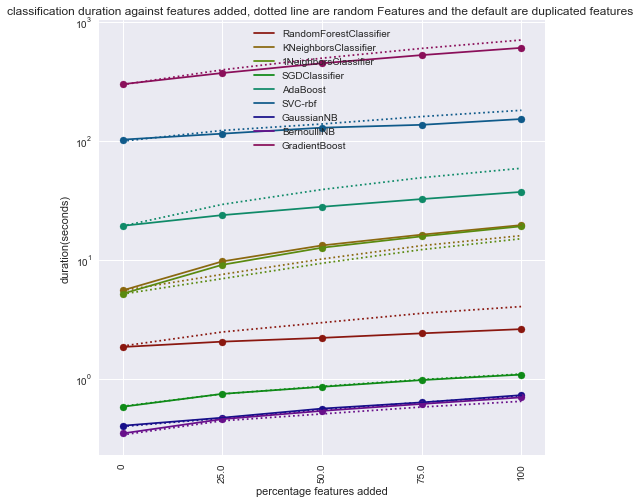

In [13]:
amountList = [0.25,0.5,0.75,1] 
cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.scatter(x_axis,dur2[i], color = cl[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
# ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

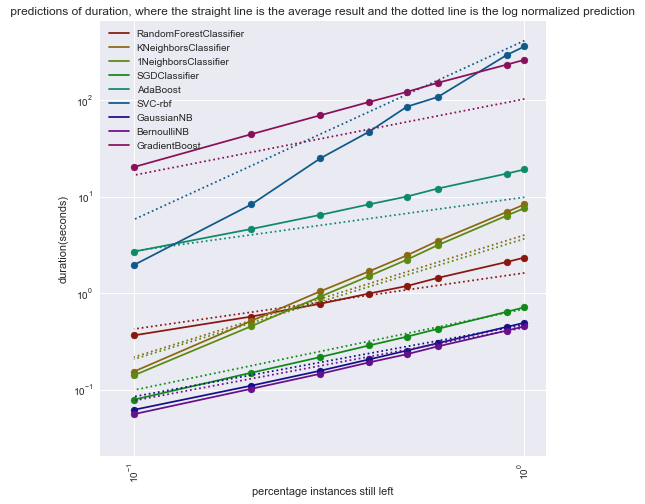

In [3]:
from sklearn.kernel_ridge import KernelRidge
from preamble import *
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
func = 'scalability'
dur90 = []
dur9 = []
list_of_files = []
for (dirpath, dirnames, filenames) in os.walk('C:\\Users\\S127788\\Documents\\GitHub\\assignment2\did'):
    for filename in filenames:
        if filename.endswith('cat.csv'): 
            list_of_files.append(int(filename[:-7]))
listExtra = []
list_of_files.remove(1177)
for did in list_of_files:
    path = 'D:\\DropboxFolder\\Dropbox\\afstudeer\\results\\scalability\\1NeighborsClassifier\\' + str(did)    
    for (dirpath, dirnames, filenames) in os.walk(path):
        for dirname in dirnames:
            if dirname == '0.8':
                listExtra.append(did)
dur1 = []
typ = 0
didList = listExtra
amountList2 = [0.0,0.1,0.4,0.5,0.6,0.7,0.8,0.9] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    for j,x in enumerate(amountList2):
        dur1[i].append(0) 
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList2):
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,did,amount)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,amount)[typ]/len(didList)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,amount)[typ+1]/len(didList)
didList = listExtra
for k,clfName in enumerate(clfNames):
    amountList = [0.0,0.1,0.4,0.7,0.8,0.9] 
    y_train = []
    X_train = []
    y_test = []
    X_test = []
    for did in didList:
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,did,amount)
            y_train.append(np.log(read_duration(func,clfName,did,amount)[typ]+read_duration(func,clfName,did,amount)[typ+1]))
#             X_train.append([np.log(1-amount),readDict(did)['NumberOfInstances'],readDict(did)['NumberOfFeatures'],did,readDict(did)['NumberOfNumericFeatures'],np.log((1-amount)*readDict(did)['NumberOfInstances'])])
            X_train.append(features(did,amount))
    lr = KernelRidge(alpha = 0.1)
    lr.fit(X_train,y_train)
    amountList = amountList2  
    for did in didList:
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,did,amount)
            y_test.append(np.log(read_duration(func,clfName,did,amount)[typ]+read_duration(func,clfName,did,amount)[typ+1]))
#             X_test.append([np.log(1-amount),readDict(did)['NumberOfInstances'],readDict(did)['NumberOfFeatures'],did,readDict(did)['NumberOfNumericFeatures'],np.log((1-amount)*readDict(did)['NumberOfInstances'])])
            X_test.append(features(did,amount))
    predictionLine = lr.predict(X_test)
    dur9.append([])
    for gluk in amountList:
        dur9[k].append(0)
    for i,ka in enumerate(X_test):
        for j,amount in enumerate(amountList):
            if np.log(1-amount) == ka[0]:
                dur9[k][j] = dur9[k][j] + np.exp(predictionLine[i])/len(didList)
    dur90.append([])
    for gluk in amountList:
        dur90[k].append(0)
    for i,ka in enumerate(X_test):
        for j,amount in enumerate(amountList):
            if np.log(1-amount) == ka[0]:
                dur90[k][j] = dur90[k][j] + np.exp(y_test[i])/len(didList)
amountList = [1-i for i in amountList]
cl = sns.hls_palette(len(dur1), l=.3, s=.8)

x_axis = amountList
fig, ax = plt.subplots()
for i in range(0,len(dur9)):
    _= ax.plot(x_axis,dur90[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur9[i], color = cl[i],ls = ':' )
    _= ax.scatter(x_axis,dur1[i], color = cl[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' predictions of duration, where the straight line is the average result and the dotted line is the log normalized prediction ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage instances still left')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

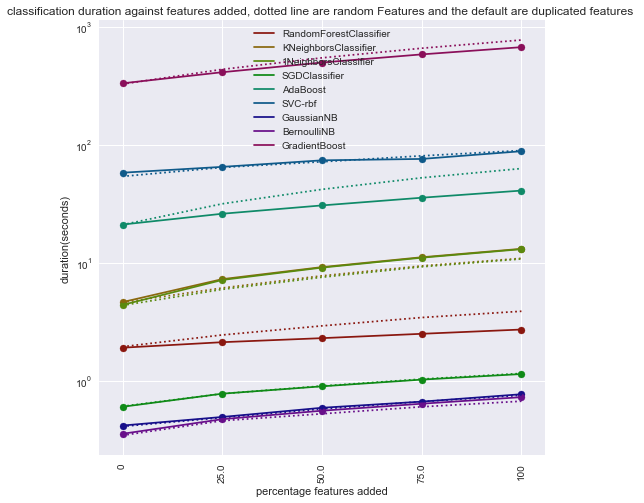

In [12]:
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
dur1 = []
dur2 = []
dur3 = []
typ = 0
didList = [991,
959,
953,
6,
60,
40706,
40702,
40697,
40696,
40695,
40687,
40680,
40678,
40677,
40670,
40664,
40656,
40655,
40654,
40653,
40652,
40651,
40650,
40649,
40648,
40647,
40646,
40645,
312,
23,
184,
182,
1022,
1036]
didList = NonCat
amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    ax.scatter(x_axis,dur2[i], color = cl[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
# ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

### analysis more features
For GradientBoost, RandomForest and AdaBoos there is clear increase in prediction time
For KNN there is a decrease in prediction duration. For numerical 

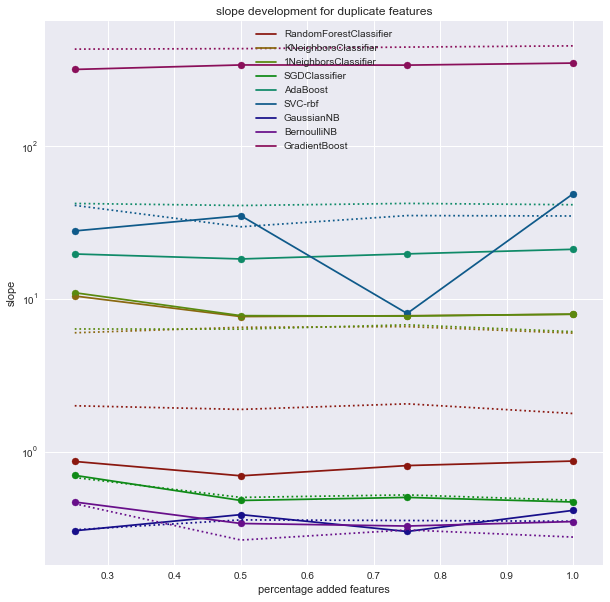

In [34]:
slopeDup = []
slopeRand = []
amountList2 = []
for i in amountList:
    amountList2.append(i/100)
for i,item in enumerate(dur2):
    slopeDup.append([])
    slopeRand.append([])
    for j,itemz in enumerate(item):
        if j == 0:
            count = 0
        else:
            slopeDup[i].append((dur2[i][j]-dur2[i][j-1])/(amountList2[j]-amountList2[j-1]))
            slopeRand[i].append((dur3[i][j]-dur3[i][j-1])/(amountList2[j]-amountList2[j-1]))

fig, ax = plt.subplots()
cl = sns.hls_palette(len(slopeDup), l=.3, s=.8)
for i,x in enumerate(slopeDup):
    ax.plot(amountList2[1:],slopeDup[i],label = clfNames[i],color= cl[i])
    ax.scatter(amountList2[1:],slopeDup[i],color= cl[i])
    ax.plot(amountList2[1:],slopeRand[i],ls = ':',color= cl[i])
plt.xlabel('percentage added features')
plt.ylabel('slope')
plt.title('slope development for duplicate features')
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_yscale("log", nonposy='clip')
plt.legend()
plt.show()

In [5]:
for i,item in enumerate(dur2):
    print(item[0],dur3[i][0])

1.9095607996110926 1.9475505737052865
4.648027522647066 4.613888095779864
4.397333492256223 4.357779424352217
0.6037467847555149 0.6091376927306834
21.063361246575752 20.986393120555654
57.86616004603338 53.86377744881117
0.418887265382742 0.4117827693157361
0.356690360796706 0.3457999006855576
330.53266717173665 325.5986653135481


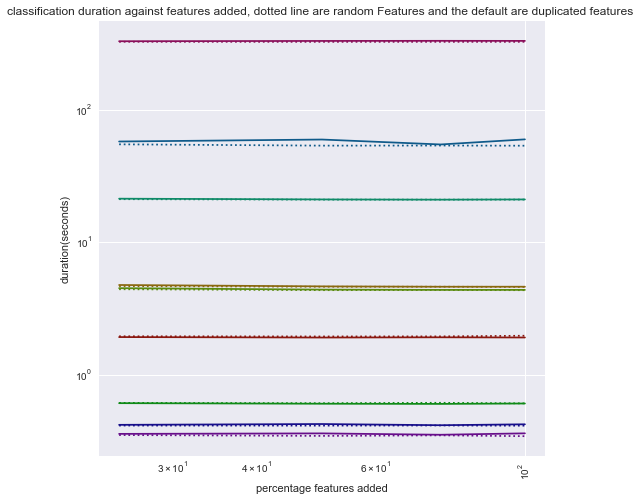

In [8]:
didList = []#Cat
for i in NonCat:
    didList.append(i)
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
dur1 = []
dur2 = []
dur3 = []
dur4 = []
typ = 0

amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    dur4.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
        dur4[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur4[cs][i] = dur4[cs][i] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur4[cs][i] = dur4[cs][i] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)

cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
#     _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
#     _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
    _= ax.plot(x_axis[1:],dur1[i], color = cl[i] )
    _= ax.plot(x_axis[1:],dur4[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

In [28]:
amountList = [0.25,0.5,0.75,1] 
comp1 = []
comp2 = []
for j,did in enumerate(didList):
    comp1.append([])
    comp2.append([])
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            
            comp1[j].append(read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ])
            comp2[j].append(read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ])
            

In [15]:
diff2 = []
for i,item in enumerate(dur3):
    diff2.append([])
    for j,itemz in enumerate(item):
        diff2[i].append(abs(dur3[i][j]-dur2[i][j])/max(dur3[i][j],dur2[i][j]))

In [36]:
diffs = []
for i,item in enumerate(comp1):
    diffs.append((abs(sum(comp1[i])-sum(comp2[i])))/max(sum(comp1[i]),sum(comp2[i])))

In [25]:
print(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))

cvScoreFeatures5 RandomForestClassifier 1038 0


In [44]:
for i,item in enumerate(diffs):
    if item > 0.1:
        print(didList[i],i)

1510 32
1570 34
30 40
32 41


In [46]:
for i,item in enumerate(comp1[32]):
    print(comp1[32][i],comp2[32][i])

0.2534270251853741 0.438092918950133
0.25385760461358586 0.4675527329163742
0.27473225439098314 0.44044733424379956
0.2522724378213752 0.47824766564008314
0.017772248189430684 0.026277364770066924
0.018868523045966867 0.02988945865217829
0.019789726924500428 0.026686950004659593
0.018133319143089466 0.03306584338133689
0.016875635308679193 0.027227621139900293
0.017268894756853115 0.028023933205986395
0.019315295889100526 0.027655866309942212
0.0180512151637231 0.03179043792624725
0.014981645545049105 0.02534250282042194
0.015348781009379309 0.025297252504969947
0.015962775078151026 0.022592963723582216
0.014950390061130747 0.026296491188986693
1.69515441848489 2.5259153623410384
1.6956321144243702 2.413473021486425
1.7708134420499846 2.492827127040073
1.691957960887521 2.6424185680953087
0.41868602826434653 0.4192911842983449
0.4137569899321534 0.4265606223489158
0.3576351460887963 0.41551628266461194
0.41598406062985305 0.4667862767309998
0.022959105517507794 0.021908611175604165
0.0

In [48]:
checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))
checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))

cvScoreFeatures5 cvScoreFeatures4


In [63]:
func3 = 'cvScoreFeatures4Fixed'
amount = 1.0
clfName = 'RandomForestClassifier'
didGrid = []
for did in didList:
    if not checkForExist(func3,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
        didGrid.append(did)
        print(func3,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))

cvScoreFeatures4Fixed RandomForestClassifier 1038 970
cvScoreFeatures4Fixed RandomForestClassifier 1043 48
cvScoreFeatures4Fixed RandomForestClassifier 1046 5
cvScoreFeatures4Fixed RandomForestClassifier 1049 37
cvScoreFeatures4Fixed RandomForestClassifier 1050 37
cvScoreFeatures4Fixed RandomForestClassifier 1063 21
cvScoreFeatures4Fixed RandomForestClassifier 1067 21
cvScoreFeatures4Fixed RandomForestClassifier 1068 21
cvScoreFeatures4Fixed RandomForestClassifier 1176 1558
cvScoreFeatures4Fixed RandomForestClassifier 11 4
cvScoreFeatures4Fixed RandomForestClassifier 12 216
cvScoreFeatures4Fixed RandomForestClassifier 1459 7
cvScoreFeatures4Fixed RandomForestClassifier 1462 4
cvScoreFeatures4Fixed RandomForestClassifier 1464 4
cvScoreFeatures4Fixed RandomForestClassifier 1466 35
cvScoreFeatures4Fixed RandomForestClassifier 1467 20
cvScoreFeatures4Fixed RandomForestClassifier 1468 856
cvScoreFeatures4Fixed RandomForestClassifier 1475 51
cvScoreFeatures4Fixed RandomForestClassifier 1476 

In [62]:
from preamble import *
list_of_files = []
for (dirpath, dirnames, filenames) in os.walk('C:\\Users\\S127788\\Documents\\GitHub\\assignment2\did'):
    for filename in filenames:
        if filename.endswith('cat.csv'): 
            list_of_files.append(int(filename[:-7]))

56

In [66]:
print(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\DropboxFolder\\Dropbox\\afstudeer\\results\\\\did\\[3, 20, 21, 26, 333, 334, 335, 40668, 4135, 4534, 469, 46, 50].csv'

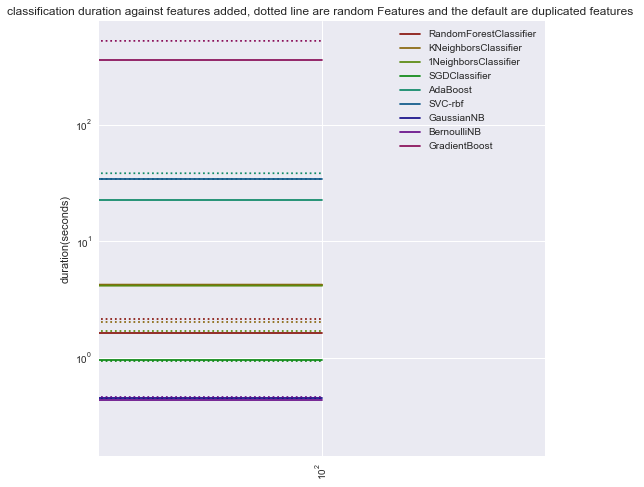

In [41]:
didList = [20, 21, 26, 333, 334, 335,40668]
didList = [12]
# for i in NonCat:
#     didList.append(i)
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5Duration'
func2 = 'cvScoreFeatures4Duration'
dur1 = []
dur2 = []
dur3 = []
typ = 0

amountList = [1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

In [26]:
for i in dur3:
    print(str(i[1]))

1.191810158823501
0.558178878374747
0.46900217839356634
0.2515474652779328
10.464229978384537
31.560247504267565
0.1216924028158246
0.11840465139539448
128.60107164863197


In [42]:
for i,item in enumerate(dur2):
    print(str(item[1],),clfNames[i],str(dur3[i][1]))

1.6369797160004964 RandomForestClassifier 2.1391538490715902
4.247448583351797 KNeighborsClassifier 2.043500389321707
4.157824196809088 1NeighborsClassifier 1.7022340319672367
0.9523206846788526 SGDClassifier 0.9381912685930729
22.84824079721875 AdaBoost 38.58253845262516
34.648362834137515 SVC-rbf 34.60109124176961
0.4449310579802841 GaussianNB 0.4489219835813856
0.42894869548035786 BernoulliNB 0.4594360082410276
364.03501378285 GradientBoost 531.3730491464376


In [40]:
from LocalDatasets import read_did
X,y = read_did(12)
print(X[0])

[98.0, 236.0, 531.0, 673.0, 607.0, 647.0, 2.0, 9.0, 3.0, 6.0, 8.0, 5.0, 225.0, 517.0, 652.0, 624.0, 628.0, 994.0, 7.0, 22.0, 28.0, 13.0, 10.0, 19.0, 305.0, 481.0, 667.0, 663.0, 1009.0, 727.0, 38.0, 28.0, 18.0, 11.0, 20.0, 10.0, 287.0, 567.0, 651.0, 742.0, 824.0, 900.0, 26.0, 34.0, 30.0, 8.0, 16.0, 13.0, 248.0, 556.0, 631.0, 796.0, 926.0, 748.0, 39.0, 34.0, 18.0, 9.0, 17.0, 12.0, 248.0, 540.0, 506.0, 814.0, 1051.0, 728.0, 38.0, 28.0, 5.0, 13.0, 16.0, 8.0, 246.0, 518.0, 751.0, 579.0, 699.0, 1062.0, 13.0, 30.0, 28.0, 10.0, 16.0, 16.0, 276.0, 344.0, 682.0, 500.0, 709.0, 916.0, 10.0, 30.0, 23.0, 17.0, 15.0, 14.0, 357.0, 435.0, 829.0, 610.0, 745.0, 994.0, 20.0, 7.0, 24.0, 12.0, 10.0, 9.0, 355.0, 409.0, 477.0, 886.0, 976.0, 723.0, 30.0, 24.0, 14.0, 7.0, 7.0, 8.0, 290.0, 352.0, 435.0, 753.0, 894.0, 751.0, 29.0, 29.0, 2.0, 13.0, 13.0, 14.0, 260.0, 286.0, 562.0, 698.0, 665.0, 757.0, 11.0, 8.0, 15.0, 14.0, 9.0, 9.0, 238.0, 292.0, 586.0, 698.0, 733.0, 707.0, 9.0, 6.0, 15.0, 11.0, 10.0, 16.0, 294.0

In [35]:
X[0]

[0.0658817,
 0.197312,
 0.103826,
 0.270362,
 0.616078,
 0.0358558,
 0.424572,
 0.0897012,
 0.367773,
 0.0370652,
 0.0759418,
 0.263906,
 0.0779031,
 0.372009,
 0.219485,
 0.0553269,
 0.108906,
 0.127752,
 0.114051,
 0.0185809,
 0.102627,
 0.172682,
 0.0730332,
 0.140344,
 0.132199,
 0.0760152,
 0.0325173,
 0.12884,
 0.120526,
 0.0166145,
 0.102583,
 0.101625,
 0.0657299,
 0.0352125,
 0.0790093,
 0.0837726,
 0.0214908,
 0.121625,
 0.0675116,
 0.0337766,
 0.0990132,
 0.059408,
 0.0812856,
 0.0523449,
 0.0904995,
 0.0635819,
 0.0811043,
 0.0591005,
 0.0972359,
 0.0415757,
 0.0835146,
 0.0423786,
 0.082965,
 0.0771704,
 0.116732,
 0.0347607,
 0.109485,
 0.0164229,
 0.0993521,
 0.113763,
 0.0863717,
 0.167654,
 0.106281,
 0.125783,
 0.0906748,
 0.0812564,
 0.123448,
 0.113374,
 0.0743426,
 0.281666,
 0.0677952,
 0.344182,
 0.0389629,
 0.394366,
 0.0499707,
 0.344871]

In [11]:
NonCat

[1038,
 1043,
 1046,
 1049,
 1050,
 1063,
 1067,
 1068,
 1176,
 11,
 12,
 1459,
 1462,
 1464,
 1466,
 1467,
 1468,
 1475,
 1476,
 1478,
 1479,
 1485,
 1487,
 1489,
 1491,
 1492,
 1493,
 1494,
 1497,
 14,
 1501,
 1504,
 1510,
 1515,
 1570,
 16,
 18,
 22,
 28,
 300,
 30,
 32,
 36,
 375,
 37,
 39,
 40499,
 40509,
 40,
 4134,
 41,
 44,
 4538,
 458,
 53,
 54]

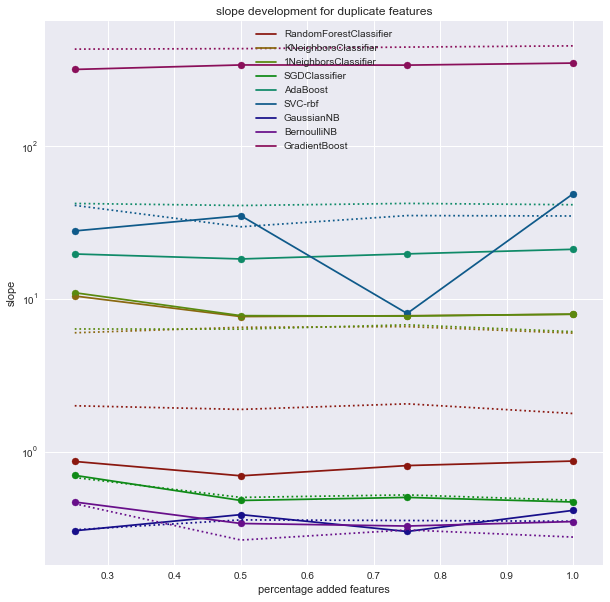

In [33]:
slopeDup = []
slopeRand = []
amountList2 = []
for i in amountList:
    amountList2.append(i/100)
for i,item in enumerate(dur2):
    slopeDup.append([])
    slopeRand.append([])
    for j,itemz in enumerate(item):
        if j == 0:
            count = 0
        else:
            slopeDup[i].append((dur2[i][j]-dur2[i][j-1])/(amountList2[j]-amountList2[j-1]))
            slopeRand[i].append((dur3[i][j]-dur3[i][j-1])/(amountList2[j]-amountList2[j-1]))

fig, ax = plt.subplots()
cl = sns.hls_palette(len(slopeDup), l=.3, s=.8)
for i,x in enumerate(slopeDup):
    ax.plot(amountList2[1:],slopeDup[i],label = clfNames[i],color= cl[i])
    ax.scatter(amountList2[1:],slopeDup[i],color= cl[i])
    ax.plot(amountList2[1:],slopeRand[i],ls = ':',color= cl[i])
plt.xlabel('percentage added features')
plt.ylabel('slope')
plt.title('slope development for duplicate features')
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_yscale("log", nonposy='clip')
plt.legend()
plt.show()
# fig, ax = plt.subplots()
# cl = sns.hls_palette(len(listCatAR2), l=.3, s=.8)
# for i,x in enumerate(listCatAR2):
#     ax.plot(amountList,x,label = clfNames[i],color= cl[i])
# plt.xlabel('percentage added features')
# plt.ylabel('slope')features')
# fig.set_figheight(10)
# fig.set_figwidth(10)
# plt.legend()
# plt.show()

In [23]:
avg = 0
for i in didList:
    avg = avg + 

[0.25, 0.5, 0.75, 1.0]

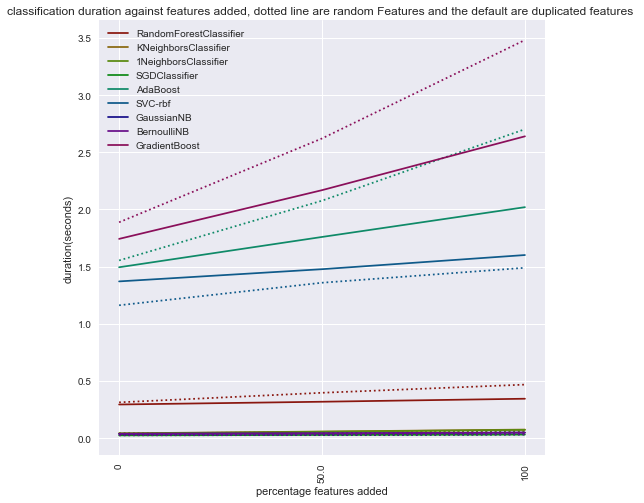

In [27]:
path = 'D:\\DropboxFolder\\Dropbox\\afstudeer\\results\\BiasVarianceSplited\\1NeighborsClassifier'
# path = 'D:\\Dropbox\\Dropbox\\afstudeer\\results\\removedFeatures\\1NeighborsClassifier'
# clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'GaussianNB', 'BernoulliNB']

listA = []
for (dirpath, dirnames, filenames) in os.walk(path):
    for dirname in dirnames:
        if float(dirname) > 2:
            listA.append(int(dirname))
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
dur1 = []
dur2 = []
dur3 = []
typ = 0
didList = listA
didList.remove(1022)
didList.remove(1025)
didList = [1068]
amountList = [0.5,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
# ax.set_yscale("log", nonposy='clip')
# ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

In [23]:
print(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))

cvScoreFeatures4 GradientBoost 1068 42


In [24]:
readDict(did)['NumberOfFeatures']-1

21

In [22]:
amount

2